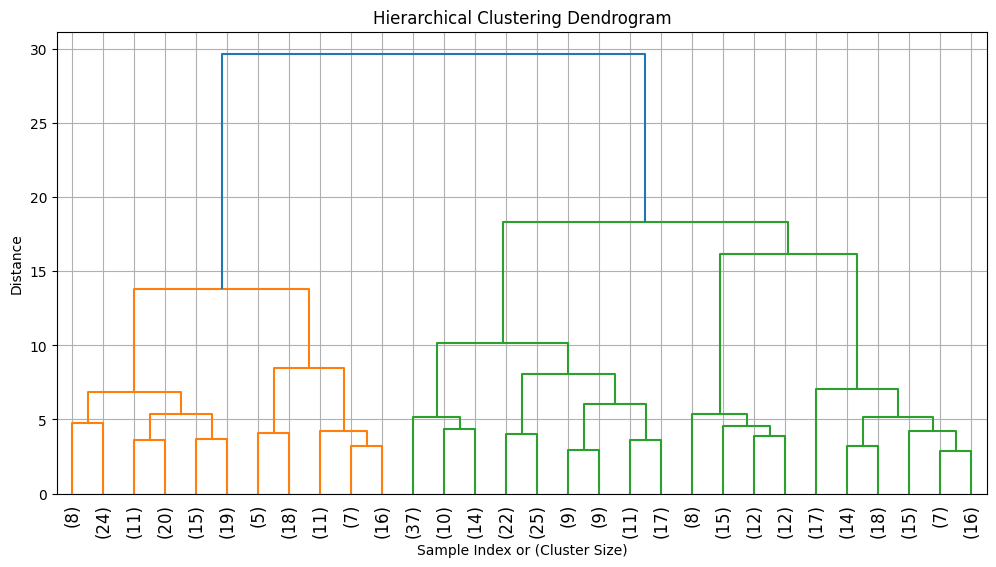

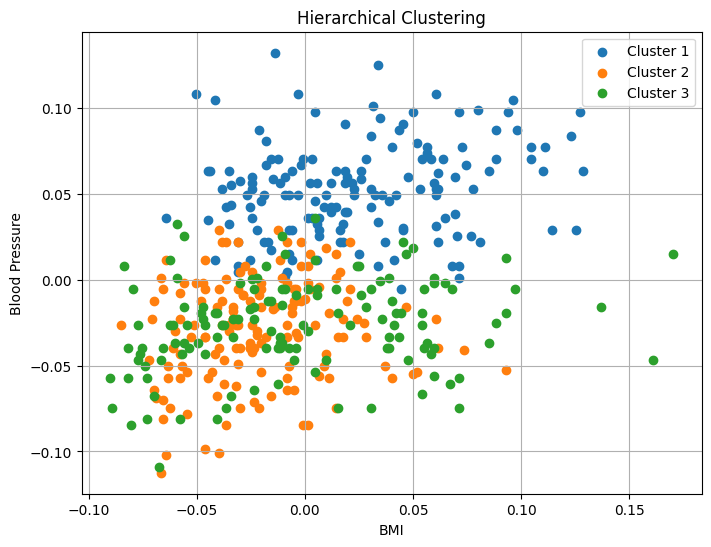

Deduplicated Records (One representative per cluster):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.034443 -0.044642  0.018584  0.056301  0.012191 -0.054549 -0.069172   
1  0.012648  0.050680 -0.022373 -0.029770  0.010815  0.028435 -0.021311   
2 -0.052738 -0.044642 -0.000817 -0.026328  0.010815  0.007141  0.048640   

         s4        s5        s6  target  
0  0.071210  0.130079  0.007207   273.0  
1  0.034309 -0.006081 -0.001078    51.0  
2 -0.039493 -0.035816  0.019633   113.0  


In [2]:
# Hierarchical Clustering for Deduplication

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import pairwise_distances_argmin_min

# Step 2: Load the Diabetes Dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Step 3: Select Features for Analysis
selected_features = ['age', 'bmi', 'bp']
df = data[selected_features].copy()

# Step 4: Standardize the Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 5: Compute the Linkage Matrix using Ward's Method
Z = linkage(df_scaled, method='ward')

# Step 6: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Step 7: Determine Optimal Number of Clusters
# Based on the dendrogram, choose the number of clusters
optimal_clusters = 3  # Adjust this based on the dendrogram

# Step 8: Assign Cluster Labels
cluster_labels = fcluster(Z, t=optimal_clusters, criterion='maxclust')
df['Cluster'] = cluster_labels

# Step 9: Identify Representative Records (Deduplication)
# Compute centroids of each cluster
centroids = []
for cluster in range(1, optimal_clusters + 1):
    cluster_points = df_scaled[cluster_labels == cluster]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

# Find the record closest to each centroid
closest, _ = pairwise_distances_argmin_min(centroids, df_scaled)
deduplicated_data = data.iloc[closest].reset_index(drop=True)

# Step 10: Visualize Clusters
plt.figure(figsize=(8, 6))
for cluster in range(1, optimal_clusters + 1):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['bmi'], cluster_data['bp'], label=f'Cluster {cluster}')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('Hierarchical Clustering')
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Output Deduplicated Records
print("Deduplicated Records (One representative per cluster):")
print(deduplicated_data)